# Importing Libraries, dataset and checking outcome

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r'/Users/stefaniadaskalaki/Google Drive/Data Immersion/6 Achievement/CF6 BRecom'

In [4]:
# setting dataframe wide view to see all columns

pd.set_option('display.max_columns', 50)

In [5]:
# importing dataset cat_prod_item_cust_ords_pay

df_all = pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'cat_prod_item_cust_ords_pay.csv'),index_col=False)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115877 entries, 0 to 115876
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     115877 non-null  int64  
 1   order_id                       115877 non-null  object 
 2   customer_id                    115877 non-null  object 
 3   order_status                   115877 non-null  object 
 4   order_approved_at              115863 non-null  object 
 5   order_delivered_customer_date  113382 non-null  object 
 6   order_estimated_delivery_date  115877 non-null  object 
 7   payment_sequential             115877 non-null  int64  
 8   payment_type                   115877 non-null  object 
 9   payment_installments           115877 non-null  int64  
 10  payment_value                  115877 non-null  float64
 11  customer_unique_id             115877 non-null  object 
 12  customer_zip_code_prefix      

# Data Cleaning

In [7]:
# dropping unnamed column

df_all=df_all.drop(columns = ['Unnamed: 0'])

## Checking for missing values

In [8]:
df_all.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_approved_at                  14
order_delivered_customer_date    2495
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_widt

In [9]:
# cleaning rows with missing values from column order_delivered_customer_date since the missing data are because orders are pending

df_all_cl=df_all.dropna()

In [10]:
df_all_cl.shape

(113368, 28)

In [11]:
df_all_cl.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

## Checking for duplicates

In [12]:
dups = df_all_cl.duplicated()

In [13]:
dups.shape

(113368,)

no duplicates found

## Checking for extreme values for the payment_value variable

/Users/stefaniadaskalaki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payment_value', ylabel='Density'>

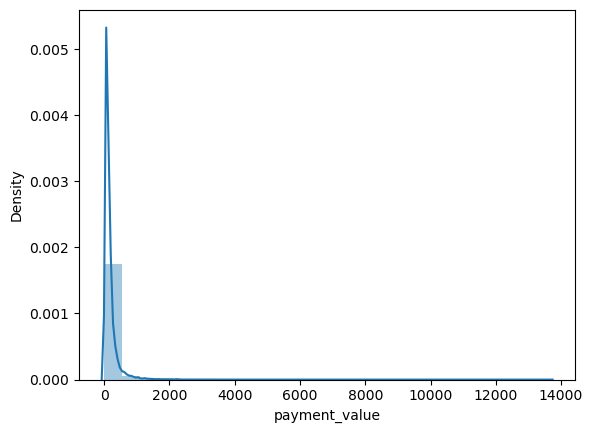

In [14]:
sns.distplot(df_all_cl['payment_value'], bins=25) 

We have some extreme values here but i don't know if they are actual outliers or just rare occasions of high priced products. For the time being i will leave them for the analysis

In [15]:
# checking the mean

df_all_cl['payment_value'].mean()

172.2222046785626

In [16]:
# checking the median

df_all_cl['payment_value'].median()

108.14

In [17]:
# checking the max

df_all_cl['payment_value'].max()

13664.08

# Preparing data for regression analysis

## Creating a scatterplot using matplotlib for price/payment_value

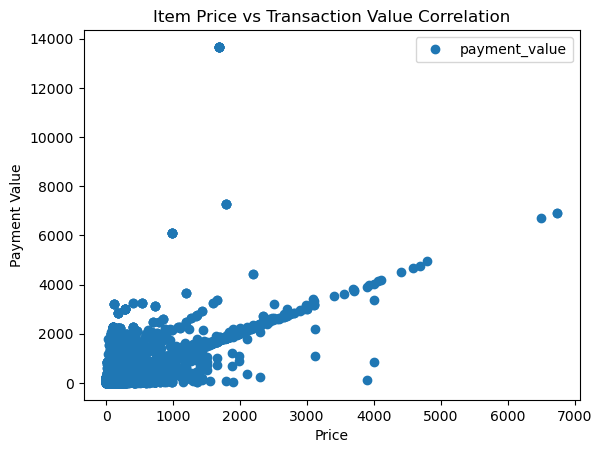

In [18]:
# for another look at how the chosen variables plot against each other.

df_all_cl.plot(x = 'price', y='payment_value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Item Price vs Transaction Value Correlation')  
plt.xlabel('Price')  
plt.ylabel('Payment Value')  
plt.show()

## Reshaping the variables into NumPy arrays and putting them into separate objects

In [19]:
X = df_all_cl['price'].values.reshape(-1,1)
y = df_all_cl['payment_value'].values.reshape(-1,1)

In [20]:
X

array([[ 29.99],
       [ 29.99],
       [ 29.99],
       ...,
       [ 39.9 ],
       [183.29],
       [100.  ]])

In [21]:
y

array([[ 18.12],
       [  2.  ],
       [ 18.59],
       ...,
       [ 84.63],
       [209.06],
       [115.45]])

## Split data into a training set and a test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Performing regression analysis

## Creating a regression object

In [23]:
regression = LinearRegression()  

# This is the regression object, which will be fit onto the training set.

## Fit the regression object onto the training set

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

## Predicting the values of y using X

In [25]:
y_predicted = regression.predict(X_test)

## Create a plot that shows the regression line from the model on the test set

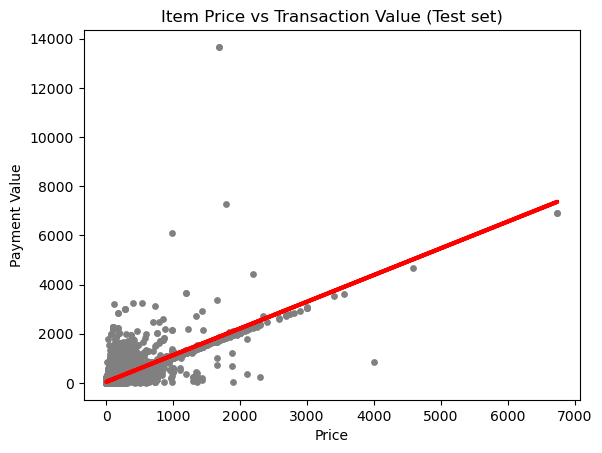

In [26]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Item Price vs Transaction Value (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Payment Value')
plot_test.show()

The linear model represented by the red regression line doesn’t perfectly cover all of the data points. In the area where the price is under 1100, there are many data points that indicate low price, which contradicts the hypothesis that as the item price goes higher the transaction value also goes higher. In this case i will need to check the performance of the model further with some statistics

## Creating objects that contain the model summary statistics

In [27]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [28]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.08699882]]
Mean squared error:  30385.83559592936
R2 score:  0.5586722212840627


The slope is positive which means that my hypothesis is in the correct direction, as the price increases the transaction value increases too. The Mean Squared Error score is high which is possible because of the extreme value 13664.08 that distorts the result. In this case the linear regression model doesn't fit these variables. However the R2 score is above average with 0.55 which tells us that it is a good fit. The results are showing us that the model fits but we have to examine the outcome without the extreme values.

In [29]:
y_predicted

array([[172.21149097],
       [ 55.19606828],
       [ 59.26144385],
       ...,
       [ 63.51160923],
       [123.40524407],
       [ 63.60943912]])

## Creating a dataframe comparing the actual and predicted values of y

In [30]:
df_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [31]:
df_data.head(30)

,Actual,Predicted
0,145.90,172.211491
1,20.03,55.196068
2,23.77,59.261444
3,439.00,500.593834
4,163.00,110.578658
5,44.23,73.403298
6,1191.48,225.583133
7,39.42,74.479427
8,86.68,117.970250
9,40.09,69.044433


From the comparison it is evident that the linear regression model is not a good fit

# Exporting df_all_cl 